# Post-processing pFRC Electromagnetics

In [1]:
# import Python libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import sys
from matplotlib import animation


# import TFLink libraries
sys.path.append("/Users/mlavell/TriForce/tfnavi")
from HDF5Reader import *
import TFNavi as navi

## Load field data

In [2]:
# load field data
path = '/Users/mlavell/TriForce/tflink/data/pFRC_f.hdf5'
fdata = HDF5Reader(path)

Loading HDF5 Field files.


In [3]:
fn = 5 # frame numbers
saveFigs= True

xmin, xmax = ( 0, 0.25)
ymin, ymax = ( 0, 0.25)
zmin, zmax = ( 0, 0.45)
vol = (xmax-xmin)*(ymax-ymin)*(zmax-zmin)

nx = fdata.frames[0].dims[2]
ny = fdata.frames[0].dims[1]
nz = fdata.frames[0].dims[0]

print(nx,ny,nz)
[dx,dy,dz] = fdata.dxdydz

xx = np.linspace(xmin, xmax, nx) + fdata.origin[0]
yy = np.linspace(ymin, ymax, ny) + fdata.origin[1]
zz = np.linspace(zmin, zmax, nz) + fdata.origin[2]

Bx = fdata.frames[fn].Bx
By = fdata.frames[fn].By
Bz = fdata.frames[fn].Bz

# convert from Telsa to Gauss
Bx *= 1e4; By *= 1e4; Bz *= 1e4

Ex = fdata.frames[fn].Ex
Ey = fdata.frames[fn].Ey
Ez = fdata.frames[fn].Ez

Jx = fdata.frames[fn].Jx
Jy = fdata.frames[fn].Jy
Jz = fdata.frames[fn].Jz

nsteps= fdata.nFrames
time= fdata.frames[fn].time

# index to slice data at midplanes
ix = nx//2
iy = ny//2
iz = nz//2

51 51 91


In [4]:
# Hot desaturated colormap
# Ref: https://towardsdatascience.com/beautiful-custom-colormaps-with-matplotlib-5bab3d1f0e72

import matplotlib.colors as mcolors

def rgb_to_dec(value):
    """ value size 3, return list of size 3 """
    return [v/256 for v in value]

def get_continuous_cmap(rgb_file):
    
    rgb_data= np.loadtxt(rgb_file,skiprows=2)
    rgb_list= [rgb_to_dec(i) for i in rgb_data]
    
    float_list= list(np.linspace(0,1,len(rgb_list)))
    cdict= dict()
    for num,col in enumerate(['red','green','blue']):
        col_list= [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col]= col_list

    cmp= mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp


cmp_fname='tfnavi/TFLink_Notebooks/hot_desaturated.gp'
cmp_hd= get_continuous_cmap(cmp_fname)

## Magnetic field

Magnetic fields in simulation midplanes at t=44.642ns


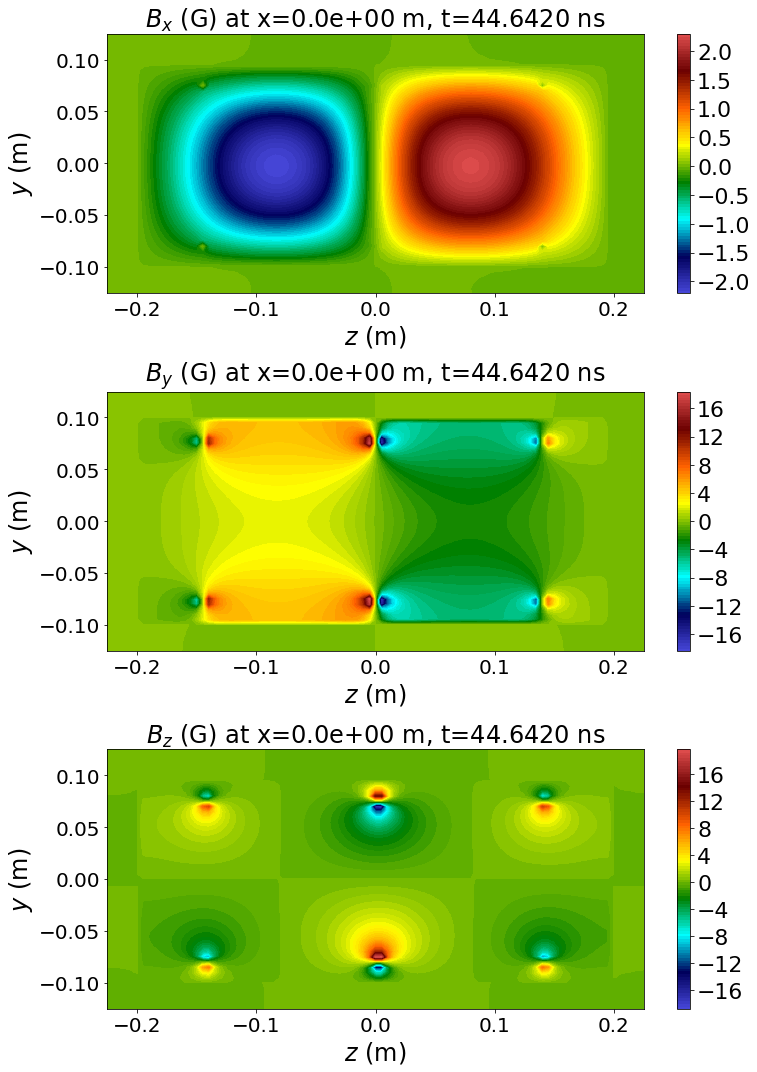

In [5]:
print(f"Magnetic fields in simulation midplanes at t={time*1e9:.3f}ns")

# Field in YZ plane ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
title=""#f"Magnetic field in zy midplane at t={time*1e9}ns"
figName="B_zy.png"

Z,Y= np.meshgrid(zz,yy,indexing="ij")

BxContourZY = navi.ContourPlot(xdata=Z,ydata=Y,zdata=Bx[:,:,ix],
                         ind=1,title=f"$B_x$ (G) at x={xx[ix]:.1e} m, t={time*1e9:.4f} ns",xlabel="$z$ (m)",ylabel="$y$ (m)",
                         cmap=cmp_hd)
ByContourZY = navi.ContourPlot(xdata=Z,ydata=Y,zdata=By[:,:,ix],
                         ind=1,title=f"$B_y$ (G) at x={xx[ix]:.1e} m, t={time*1e9:.4f} ns",xlabel="$z$ (m)",ylabel="$y$ (m)",
                         cmap=cmp_hd)
BzContourZY = navi.ContourPlot(xdata=Z,ydata=Y,zdata=Bz[:,:,ix],
                         ind=1,title=f"$B_z$ (G) at x={xx[ix]:.1e} m, t={time*1e9:.4f} ns",xlabel="$z$ (m)",ylabel="$y$ (m)",
                         cmap=cmp_hd)

navi.make_subplots(BxContourZY,ByContourZY,BzContourZY,nrows=3,ncols=1,fig_title=title,figsize=(11,15),save_fig=saveFigs,save_name=figName)


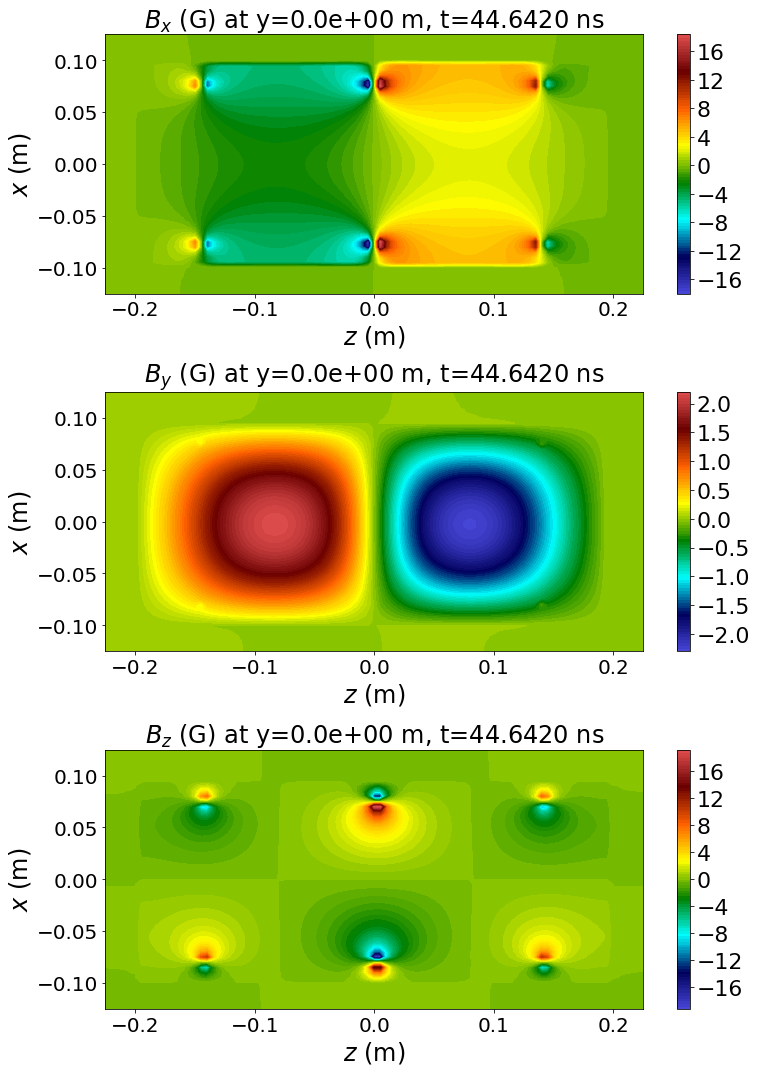

In [6]:
# Field in XZ plane ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
title=""#f"Magnetic field in zx midplane at t={time*1e9}ns"
figName="B_zx.png"

Z,X = np.meshgrid(zz,xx,indexing="ij")
BxContourZX = navi.ContourPlot(xdata=Z,ydata=X,zdata=Bx[:,iy,:],
                         ind=1,title=f"$B_x$ (G) at y={yy[iy]:.1e} m, t={time*1e9:.4f} ns",xlabel="$z$ (m)",ylabel="$x$ (m)",
                         cmap=cmp_hd)
ByContourZX = navi.ContourPlot(xdata=Z,ydata=X,zdata=By[:,iy,:],
                         ind=1,title=f"$B_y$ (G) at y={yy[iy]:.1e} m, t={time*1e9:.4f} ns",xlabel="$z$ (m)",ylabel="$x$ (m)",
                         cmap=cmp_hd)
BzContourZX = navi.ContourPlot(xdata=Z,ydata=X,zdata=Bz[:,iy,:],
                         ind=1,title=f"$B_z$ (G) at y={yy[iy]:.1e} m, t={time*1e9:.4f} ns",xlabel="$z$ (m)",ylabel="$x$ (m)",
                         cmap=cmp_hd)

navi.make_subplots(BxContourZX,ByContourZX,BzContourZX,nrows=3,ncols=1,fig_title=title,figsize=(11,15),save_fig=saveFigs,save_name=figName)

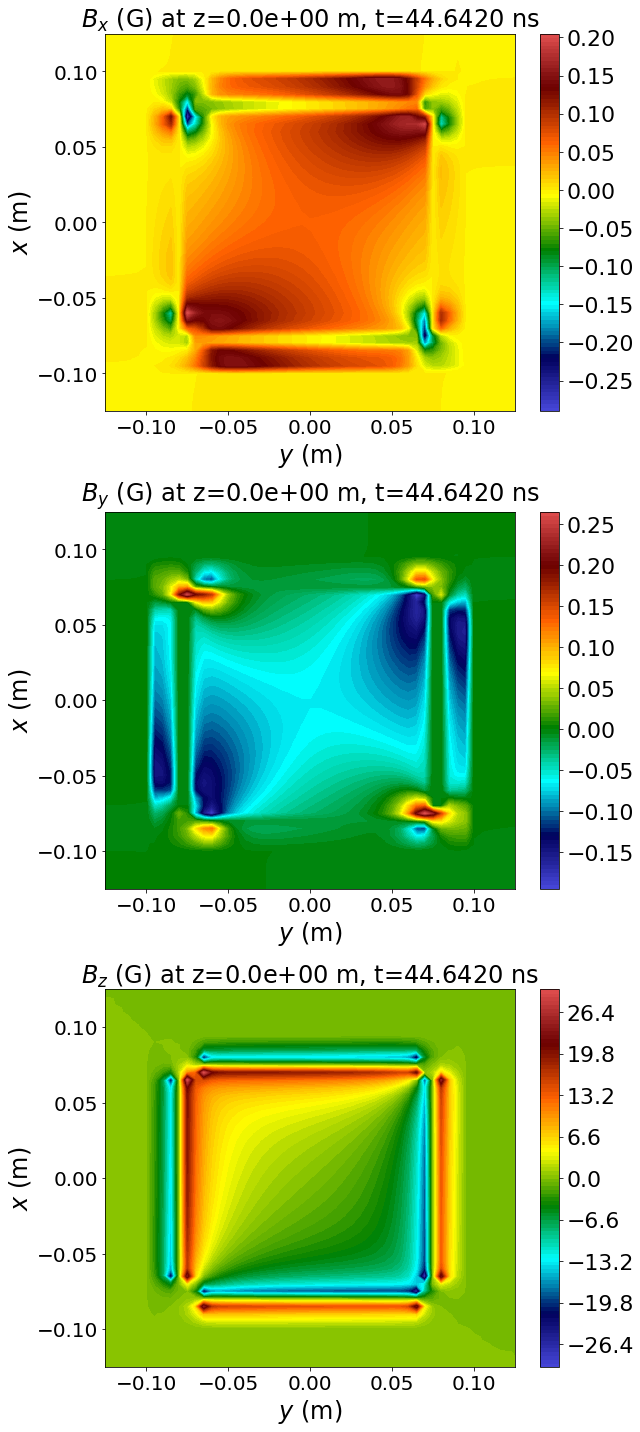

In [7]:
# Field in XY plane ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
title=""#f"Magnetic field in xy midplane at t={time*1e9}ns"
figName="B_xy.png"

Y,X = np.meshgrid(yy,xx,indexing="ij")
BxContourXY = navi.ContourPlot(xdata=Y,ydata=X,zdata=Bx[iz,:,:],
                         ind=1,title=f"$B_x$ (G) at z={zz[iz]:.1e} m, t={time*1e9:.4f} ns",xlabel="$y$ (m)",ylabel="$x$ (m)",
                         cmap=cmp_hd)
ByContourXY = navi.ContourPlot(xdata=Y,ydata=X,zdata=By[iz,:,:],
                         ind=1,title=f"$B_y$ (G) at z={zz[iz]:.1e} m, t={time*1e9:.4f} ns",xlabel="$y$ (m)",ylabel="$x$ (m)",
                         cmap=cmp_hd)
BzContourXY = navi.ContourPlot(xdata=Y,ydata=X,zdata=Bz[iz,:,:],
                         ind=1,title=f"$B_z$ (G) at z={zz[iz]:.1e} m, t={time*1e9:.4f} ns",xlabel="$y$ (m)",ylabel="$x$ (m)",
                         cmap=cmp_hd)

navi.make_subplots(BxContourXY,ByContourXY,BzContourXY,nrows=3,ncols=1,fig_title=title,figsize=(9,20),save_fig=saveFigs,save_name=figName)


## Electric field

Electric fields in simulation midplanes at t=44.642ns


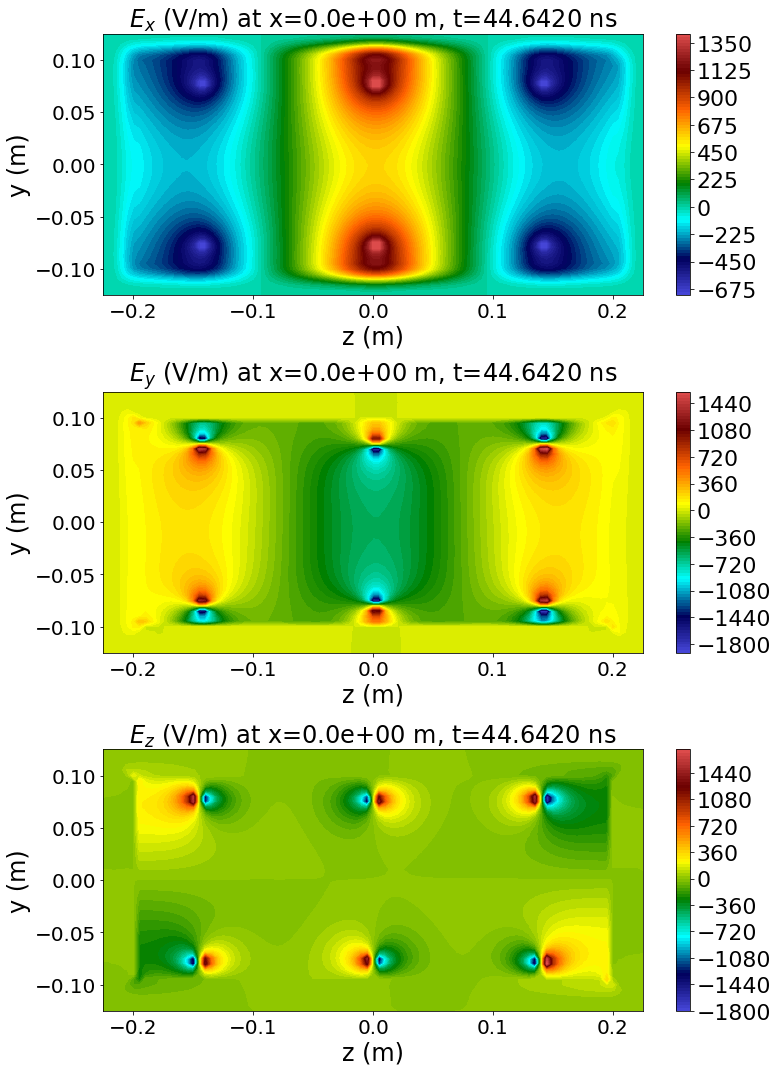

In [8]:
print(f"Electric fields in simulation midplanes at t={time*1e9:.3f}ns")

# Field in ZY plane ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
title=""#f"Electric field in zy midplane at t={time*1e9}ns"
figName="E_zy.png"

Z,Y= np.meshgrid(zz,yy,indexing="ij")
ExContourZY= navi.ContourPlot(xdata=Z,ydata=Y,zdata=Ex[:,:,ix],
                         ind=1,title=f"$E_x$ (V/m) at x={xx[ix]:.1e} m, t={time*1e9:.4f} ns",xlabel="z (m)",ylabel="y (m)",
                         cmap=cmp_hd)
EyContourZY= navi.ContourPlot(xdata=Z,ydata=Y,zdata=Ey[:,:,ix],
                         ind=1,title=f"$E_y$ (V/m) at x={xx[ix]:.1e} m, t={time*1e9:.4f} ns",xlabel="z (m)",ylabel="y (m)",
                         cmap=cmp_hd)
EzContourZY= navi.ContourPlot(xdata=Z,ydata=Y,zdata=Ez[:,:,ix],
                         ind=1,title=f"$E_z$ (V/m) at x={xx[ix]:.1e} m, t={time*1e9:.4f} ns",xlabel="z (m)",ylabel="y (m)",
                         cmap=cmp_hd)

navi.make_subplots(ExContourZY,EyContourZY,EzContourZY,nrows=3,ncols=1,fig_title=title,figsize=(11,15),save_fig=saveFigs,save_name=figName)



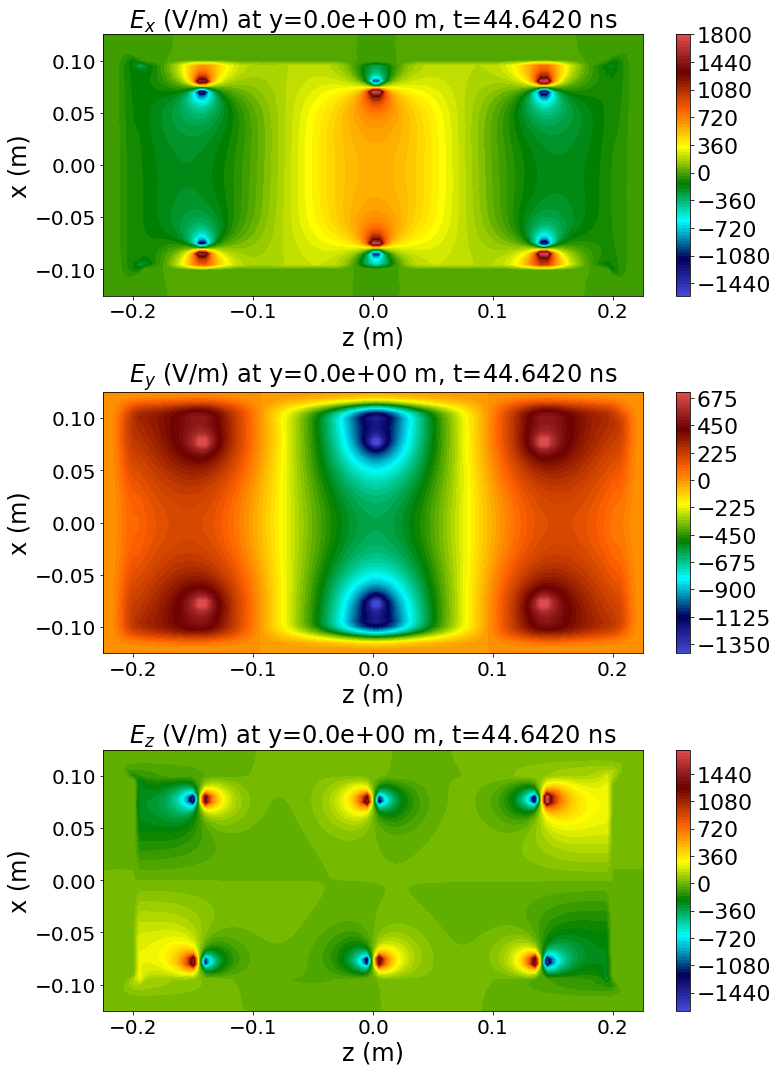

In [9]:
# Field in ZX plane ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
title=""#f"Electric field in zx midplane at t={time*1e9}ns"
figName="E_zx.png"

Z,X= np.meshgrid(zz,xx,indexing="ij")
ExContourZX= navi.ContourPlot(xdata=Z,ydata=X,zdata=Ex[:,iy,:],
                         ind=1,title=f"$E_x$ (V/m) at y={yy[iy]:.1e} m, t={time*1e9:.4f} ns",xlabel="z (m)",ylabel="x (m)",
                         cmap=cmp_hd)
EyContourZX= navi.ContourPlot(xdata=Z,ydata=X,zdata=Ey[:,iy,:],
                         ind=1,title=f"$E_y$ (V/m) at y={yy[iy]:.1e} m, t={time*1e9:.4f} ns",xlabel="z (m)",ylabel="x (m)",
                         cmap=cmp_hd)
EzContourZX= navi.ContourPlot(xdata=Z,ydata=X,zdata=Ez[:,iy,:],
                         ind=1,title=f"$E_z$ (V/m) at y={yy[iy]:.1e} m, t={time*1e9:.4f} ns",xlabel="z (m)",ylabel="x (m)",
                         cmap=cmp_hd)

navi.make_subplots(ExContourZX,EyContourZX,EzContourZX,nrows=3,ncols=1,fig_title=title,figsize=(11,15),save_fig=saveFigs,save_name=figName)


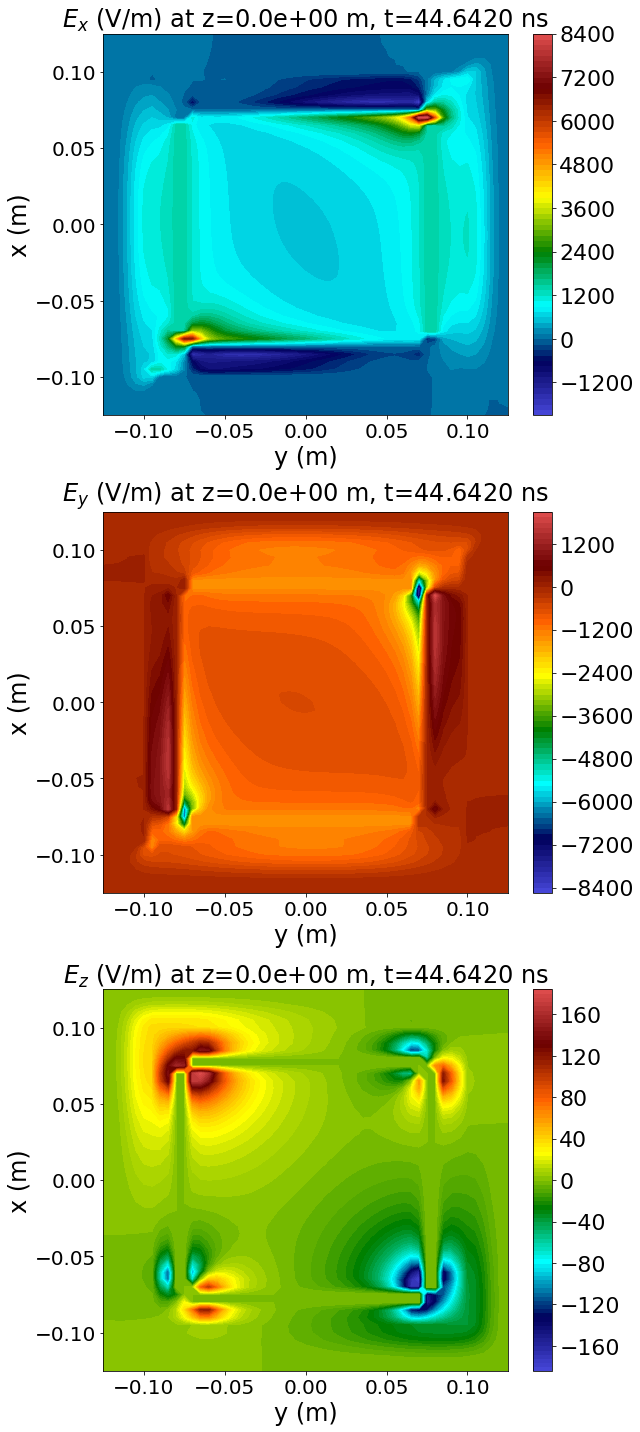

In [10]:
# Field in XY plane ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
title=""#f"Electric field in xy midplane at t={time*1e9}ns"
figName="E_xy.png"


Y,X= np.meshgrid(yy,xx,indexing="ij")
ExContourYX= navi.ContourPlot(xdata=Y,ydata=X,zdata=Ex[iz,:,],
                         ind=1,title=f"$E_x$ (V/m) at z={zz[iz]:.1e} m, t={time*1e9:.4f} ns",xlabel="y (m)",ylabel="x (m)",
                         cmap=cmp_hd)
EyContourYX= navi.ContourPlot(xdata=Y,ydata=X,zdata=Ey[iz,:,],
                         ind=1,title=f"$E_y$ (V/m) at z={zz[iz]:.1e} m, t={time*1e9:.4f} ns",xlabel="y (m)",ylabel="x (m)",
                         cmap=cmp_hd)
EzContourYX= navi.ContourPlot(xdata=Y,ydata=X,zdata=Ez[iz,:,],
                         ind=1,title=f"$E_z$ (V/m) at z={zz[iz]:.1e} m, t={time*1e9:.4f} ns",xlabel="y (m)",ylabel="x (m)",
                         cmap=cmp_hd)

navi.make_subplots(ExContourYX,EyContourYX,EzContourYX,nrows=3,ncols=1,fig_title=title,figsize=(9,20),save_fig=saveFigs,save_name=figName)


## Field on axis

In [11]:
# look at fields along x-axis of machine
ix = nx//2
iy = ny//2

BxAxis = Bx[:,iy,ix]
ByAxis = By[:,iy,ix]
BzAxis = Bz[:,iy,ix]

ExAxis = Ex[:,iy,ix]
EyAxis = Ey[:,iy,ix]
EzAxis = Ez[:,iy,ix]

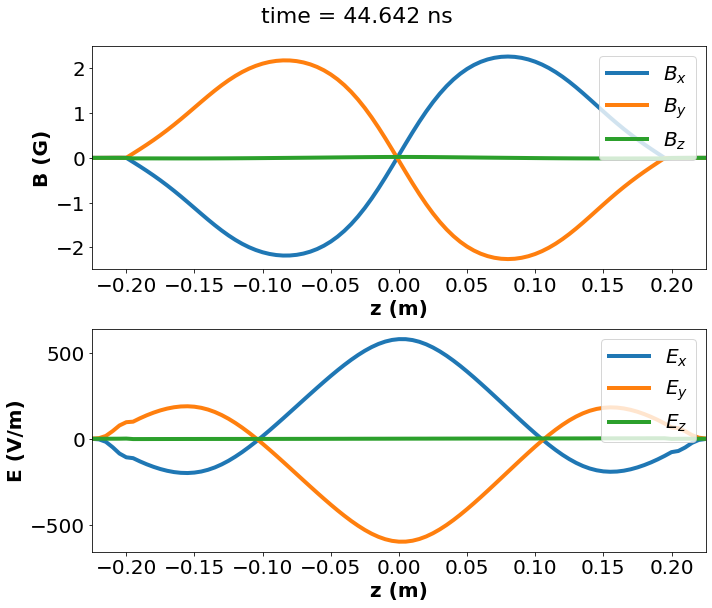

In [12]:
fig,ax = plt.subplots(2,1,figsize=(10,8),tight_layout=True)

fig.suptitle(f"time = {time*1e9:.3f} ns",fontsize=22,y=1.05)

# B ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ax[0].set_xlabel(r'z (m)',fontsize=20,weight='bold')
ax[0].set_ylabel(r'B (G)',fontsize=20,weight='bold')

ax[0].plot(zz,BxAxis,linewidth=4,label=r'$B_x$')
ax[0].plot(zz,ByAxis,linewidth=4,label=r'$B_y$')
ax[0].plot(zz,BzAxis,linewidth=4,label=r'$B_z$')

# E ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ax[1].set_xlabel(r'z (m)',fontsize=20,weight='bold')
ax[1].set_ylabel(r'E (V/m)',fontsize=20,weight='bold')

ax[1].plot(zz,ExAxis,linewidth=4,label=r'$E_x$')
ax[1].plot(zz,EyAxis,linewidth=4,label=r'$E_y$')
ax[1].plot(zz,EzAxis,linewidth=4,label=r'$E_z$')

#ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

[axis.tick_params(labelsize=20) for axis in ax]
[axis.legend(fontsize=20,loc=1) for axis in ax]
[axis.set_xlim([zz[0],zz[-1]]) for axis in ax]

plt.show()